In [46]:
import pandas as pd
df=pd.read_csv('E:\\TE_Project\\datacsv\\India.csv',index_col='date_time',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

Shape of data (2009, 24)


,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,24,11,0.0,8.7,5,72,02:39 PM,03:24 AM,07:14 AM,05:36 PM,...,10,14,37,0.0,1017,24,10,63,6,India
2015-01-02,18,11,0.0,5.5,3,80,03:27 PM,04:21 AM,07:14 AM,05:36 PM,...,15,60,62,1.7,1019,18,8,96,10,India
2015-01-03,19,13,0.0,8.7,5,87,04:16 PM,05:16 AM,07:15 AM,05:37 PM,...,8,38,82,0.0,1018,19,10,113,5,India
2015-01-04,23,13,0.0,8.7,5,94,05:08 PM,06:08 AM,07:15 AM,05:38 PM,...,18,1,60,0.0,1019,23,10,322,12,India
2015-01-05,21,10,0.0,8.7,5,100,06:01 PM,06:57 AM,07:15 AM,05:38 PM,...,23,0,48,0.0,1016,21,10,296,16,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,43,33,0.0,14.0,8,44,11:18 AM,No moonset,05:26 AM,07:23 PM,...,19,44,31,0.3,994,43,10,235,16,India
2020-06-28,45,34,0.0,12.2,9,52,12:20 PM,12:11 AM,05:26 AM,07:23 PM,...,19,30,32,0.5,994,45,10,244,16,India
2020-06-29,43,38,0.0,13.3,9,59,01:24 PM,12:48 AM,05:27 AM,07:23 PM,...,15,34,31,2.0,995,43,10,245,13,India


In [47]:
df=df[['tempC']]

In [48]:
df

,tempC
date_time,
2015-01-01,24
2015-01-02,18
2015-01-03,19
2015-01-04,23
2015-01-05,21
...,...
2020-06-27,43
2020-06-28,45
2020-06-29,43


<AxesSubplot:xlabel='date_time'>

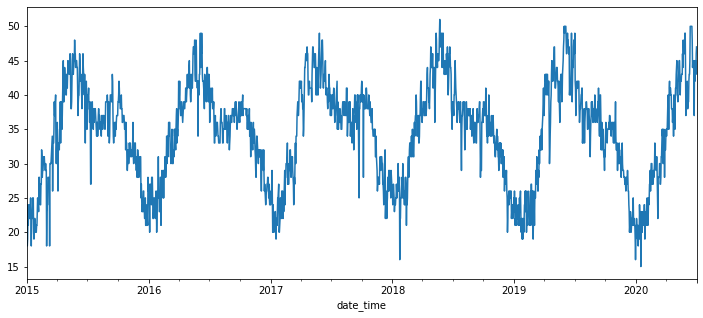

In [49]:
df['tempC'].plot(figsize=(12,5))

In [50]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['tempC'])

1. ADF :  -3.1170063431303165
2. P-Value :  0.025319974865599993
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 1986
5. Critical Values :
	 1% :  -3.4336469649065298
	 5% :  -2.862996415949189
	 10% :  -2.5675453345421984


In [51]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['tempC'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8834.483, Time=1.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=13661.989, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9016.138, Time=0.16 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=11802.585, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=20018.643, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8861.879, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8832.778, Time=0.81 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8920.278, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=8950.461, Time=0.28 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=8834.443, Time=1.42 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=8916.385, Time=0.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8836.731, Time=1.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=8840.302, Time=0.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 6.734 seconds


In [52]:
print(df.shape)
train=df.iloc[:-500]
test=df.iloc[-500:]
print(train.shape,test.shape)


(2009, 1)
(1509, 1) (500, 1)


In [53]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['tempC'],order=(2,0,1))
model=model.fit()
model.summary()

c:\users\muskan\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\muskan\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No fre

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  tempC   No. Observations:                 1509
Model:                     ARMA(2, 1)   Log Likelihood               -3307.279
Method:                       css-mle   S.D. of innovations              2.164
Date:                Tue, 13 Apr 2021   AIC                           6624.557
Time:                        20:48:14   BIC                           6651.153
Sample:                    01-01-2015   HQIC                          6634.462
                         - 02-17-2019                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          32.2205      3.259      9.886      0.000      25.832      38.609
ar.L1.tempC     1.4872      0.037     40.030      0.000       1.414       1.560
ar.L2.tempC    -0.4901      0.037    -13.368      0.000      -0.562      -0.418
ma.L1.tempC    -0.8171      0.024    -34.405      0.000      -0.864      -0.771
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0059           +0.0000j            1.0059            0.0000
AR.2            2.0284           +0.0000j            2.0284            0.0000
MA.1            1.2238           +0.0000j            1.2238            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='date_time'>

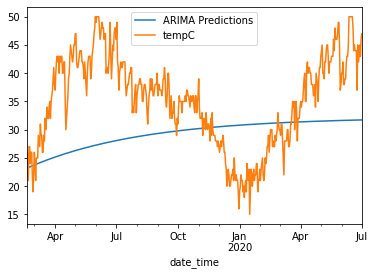

In [55]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['tempC'].plot(legend=True)